# CAS KAGGLE: Fish Market

## **NOM**: Lucía Carmona ####

## **NIU**: 1606605 ####

### 1.INTRODUCCIÓ I OBJECTIU

El cas Kaggle consta del tractament d’una base de dades assignada a cada
alumne ( una base de dades diferent per a cada alumne).

L’objectiu és, depenent de la base de dades i el que puguis treballar amb ella,
tractar la base per assolir un objectiu final. Ja pot ser predir una variable com
fer una base de dades més "neta".

La meva base de dades és la de Fish Market. Aquesta base de dades representa el
que seria un mercat de peix (el que té o pot tenir cada "paradeta"). Consta de 7
diferents espècies de peixos amb els seus respectius pesos, alçades, longituts, etc.

El meu objectiu és, a partir de les característiques que vénen donades a la
base de dades, predir de quina espècie de peix estem parlant.

In [307]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

path = 'Fish.csv'
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset(path)

### 2. TRACTAMENT DE LES DADES

En aquesta part del codi, mirarem com és el nostre Dataset i el començarem a tractar per a que sigui més fàcil treballar amb ell. 

Primer de tot, mirarem quines son les primeres lineas del nostre dataset per assegurar-nos de que sigui l'adecuat i funcioni al nostre Jupyter. 

In [308]:
dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Podem comprovar que el nostre dataset consta de les variables Species, Weight, Lenght1, Lenght2, Lenght3, Height i Width. 

Ara comrpovarem si hi ha NANs en el nostre dataset fen la suma per columnes i en total de les variables al nostre dataset. 

In [309]:
dataset.isna().sum().sum() 

0

Veiem que no hi ha cap NAN, i això fara que treballar amb aquesta base de dades sigui més fàcil. 

El següent que voldrem fer és saber com és la base de dades amb la que estem treballant. Voldrem saber la seva dimensió, per ser més concrets. 

In [310]:
data = dataset.values

x = data[:,[i for i in range(data.shape[1]) if dataset.columns[i] not in ['Species']]]
colX = [i for i in dataset.columns if i not in ['Species']]
y = data[:,dataset.columns.get_loc('Species')]  

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape) 

Dimensionalitat de la BBDD: (159, 7)
Dimensionalitat de les entrades X (159, 6)
Dimensionalitat de l'atribut Y (159,)


Veiem que la nostra base de dades té una dimensió de (159, 7), la de les entrades X és (159,6) i la de l'atribut Y és (159, 1). 

Ara utilitzarem la funció describe per veure estadístiques dels atributs numèrics de la base de dades. 

In [311]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Les variables Lenght poden ser confuses, així que com que en aquesta part del codi estem millorant la base de dades per a que sigui més fàcil treballar amb ella, reescriurem el nom de les variables i tornarem a imprimir les estadístiques dels atributs un cops canviats de nom. 

In [312]:
dataset = dataset.rename({'Length1':'Vertical_length', 'Length2':'Diagonal_length', 'Length3': 'Cross_length'}, axis = 'columns')
dataset.describe()

,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Per poder visualitzar millor la nostra base de dades per cada característica que presenta, imprimim en forma de histograma els valors per cada característica. 

Així podem veure entre quins valors es reparteixen les nostres característiques i quina és la distribució que segueixen. 

Clarament podem veure que les distribucions no son molt exactes matemàticament. Hi ha, per això, algunes característiques (com Length1, Length2 i Width) que si que semblen que segueixen una distribució Gaussiana. 

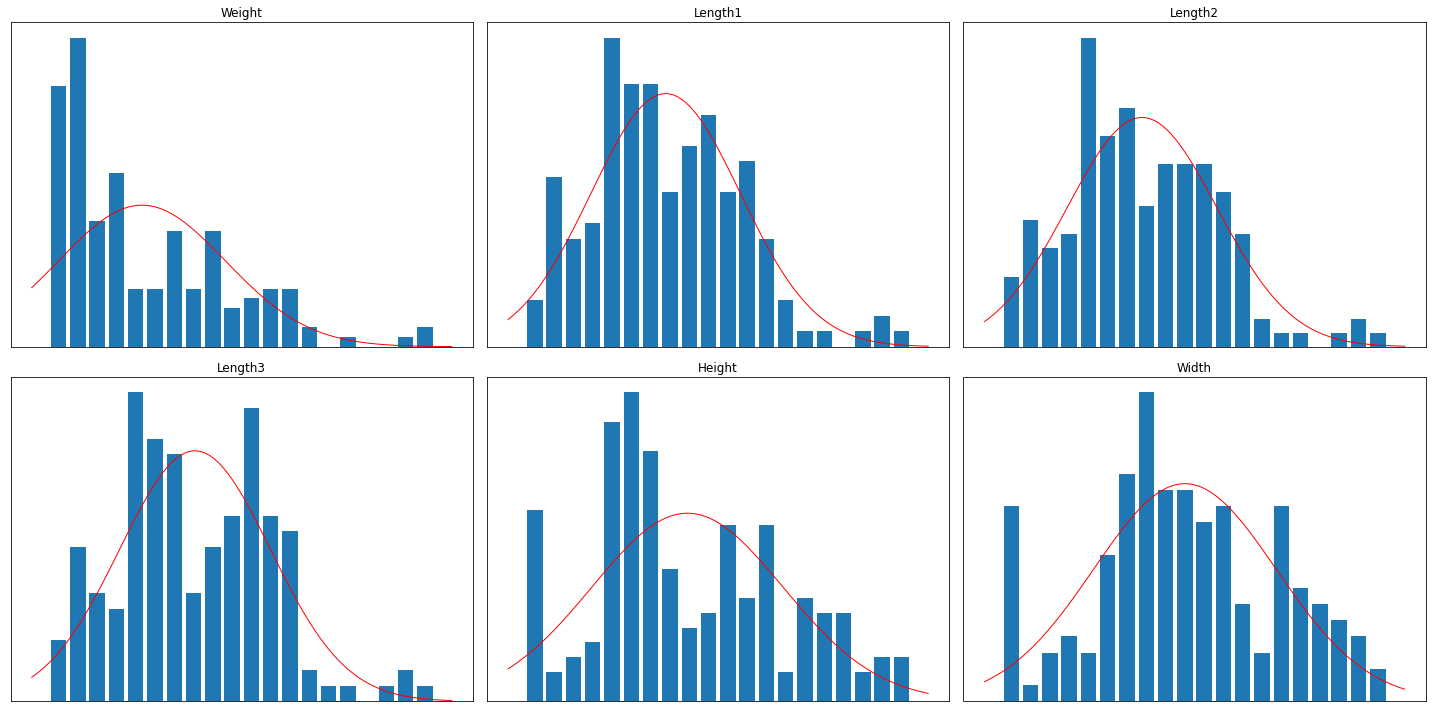

In [313]:
np.warnings.filterwarnings('ignore') # per ignorar warnings que no són preocupants
import math
import scipy.stats as stats
from scipy.stats import norm

fig = plt.figure(figsize=(20, 10))

for i in range(6):
    xi = x[:,i]
    xi = xi.astype(float)
    plt.subplot(2,3, i+1)
    plt.hist(xi, bins=20, range=[np.nanmin(xi), np.nanmax(xi)],density=True, histtype="bar", rwidth=0.8, label="hola")
    plt.title(colX[i])

    xi = xi[~np.isnan(xi)]
    mu, std = norm.fit(xi) 
    xmin, xmax = plt.xlim()
    xh = np.linspace(xmin, xmax, 100)
    p = norm.pdf(xh, mu, std)
    plt.plot(xh, p, 'k', linewidth=1,color='r')
        
    g = plt.gca()
    g.axes.get_xaxis().set_visible(False)
    g.axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()    

### 3. ENTRENANT EL MODEL 

Un cop sabem com és la nostra base de dades, podem començar a entrenar-ho. 

Primer de tot hem de fixar un objectiu.

En aquest cas, he centrat el treball en predir quin tipus de peix estem estudiant depenent de les característiques donades. 

Fixat llavors l'objectiu, el primer que farem serà dividir el nostre model en Train i Test.

In [314]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0, stratify = y)

print("X_train:\n ", x_train, "\n")
print("Y_train:\n", y_train, "\n")
print("X_test:\n", x_test, "\n")
print("Y_test:\n", y_test)

X_train:
  [[1000.0 41.1 44.0 46.6 12.4888 7.5958]
 [650.0 36.5 39.0 41.4 11.1366 6.002999999999999]
 [900.0 37.0 40.0 42.5 11.73 7.225]
 [7.5 10.0 10.5 11.6 1.972 1.16]
 [510.0 40.0 42.5 45.5 6.825 4.459]
 [85.0 17.8 19.6 20.8 5.1376 3.0368]
 [160.0 20.5 22.5 25.3 7.0334 3.8203]
 [475.0 28.4 31.0 36.2 14.2628 5.1042]
 [78.0 16.8 18.7 19.4 5.1992 3.1234]
 [9.8 11.4 12.0 13.2 2.2044 1.1484]
 [450.0 26.8 29.7 34.7 13.6024 4.9274]
 [218.0 25.0 26.5 28.0 7.167999999999999 4.144]
 [770.0 44.8 48.0 51.2 7.68 5.376]
 [1000.0 33.5 37.0 42.6 18.957 6.603]
 [9.9 11.3 11.8 13.1 2.2139 1.1659]
 [450.0 27.6 30.0 35.1 14.0049 4.8438]
 [500.0 28.7 31.0 36.2 14.3714 4.8146]
 [150.0 20.5 22.5 24.0 6.792000000000001 3.6239999999999997]
 [110.0 19.0 21.0 22.5 5.6925 3.555]
 [690.0 34.6 37.0 39.3 10.5717 6.3666]
 [130.0 20.5 22.5 24.0 5.856 3.6239999999999997]
 [273.0 23.0 25.0 28.0 11.088 4.144]
 [9.7 10.4 11.0 12.0 2.1959999999999997 1.38]
 [200.0 22.1 23.5 26.8 7.3968 4.1272]
 [51.5 15.0 16.2 17.2 4.59

Avans d'entrenar el model, és de molta ajuda poder visualitzar com és el nostre model per així saber mes o menys quines funcions o maneres d'entrenar-lo funcionaran millor pel nostre cas. Per fer-ho, podem imprimir un histograma de com estan repartieds les nostres variables en el dataset. És a dir, podem veure quina espècien de peix (en aquest cas) te més quantitat de peixos. 

<AxesSubplot:>

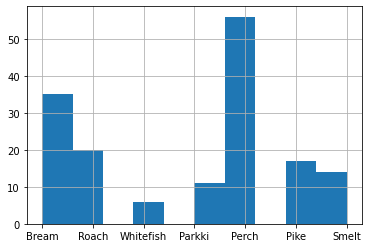

In [315]:
dataset['Species'].hist()

Clarament podem veure que Perch és la espècie que té més quantitat de peixos en el nostre dataset. Però veiem que la espècie Whitefish no es quasi notable ( hi ha menys de 10 peixos que siguin Whitefish al nostre dataset ) cosa que podria ser un problema a l'hora de fer una classificació, ja que, al no ser gaire notable, podria ser omitit o no considerat com a Whitefish. 

Manualment podem comprovar quants peixos hi ha de cada espècie al nostra dataset imprimint les y. Aquí es veu clarament que el Whitefish és el menys repetit (hi ha un total de sis peixos en el dataset). 

In [316]:
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

També, per tenir millor idea del dataset i com tratar-ho, podem també imprimir els histogrames de com estan repartides les dades per espècies tant al train com al test (així ens assegurem que els dos, també, tinguin semblança entre ells).

(array([39., 10.,  0., 12.,  0., 14., 24.,  0.,  8.,  4.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

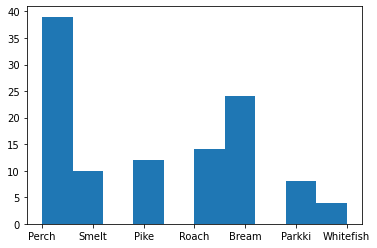

In [317]:
plt.hist(y_train)

(array([17.,  4.,  0., 11.,  0.,  5.,  2.,  0.,  6.,  3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

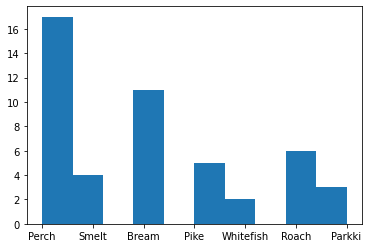

In [318]:
plt.hist(y_test)

Com que el meu objectiu és pedir una variable com la de espècies, realment el que estarem fent serà classificar els peixos a cada classe depenent de les seves característiques (sent la paraula clau classificar).

Per això, si apliquem els coneixements de classe, podem veure que una de les millors maneres de fer-ho és utilitzant les funcions de One vs One i One vs Rest. 

Tot i que siguin solt bones maneres de classificar un dataset, es veu que en el nostre cas la funció One vs One no funcionarà molt be ja que anirà comparant entre dos espècies i si dona el cas de que no sigui cap de les dues pot arribar a classificar-ho com una de les dos que s'estan comparant i que en realitat no és l'espècie del peix que estem comparant. 

També serà un problema, com he dit abans, l'espècie Whitefish en aquest tipus de classificació per la falta de dades. Llavors segurament el programa classificarà els Whitefish com a un altre peix.

Encara tenint aquests dos inconvenients, aquest mètode de classificació és el més adequat pel meu dataset (el de One vs Rest).

In [319]:
def convert_dataset_to_binary_one_vs_one(x,y, positive_class, negative_class):
    sub_x = x[(y == positive_class)|(y == negative_class)]
    sub_y = y[(y == positive_class)|(y == negative_class)]
    sub_y[sub_y == negative_class] = 0.0 #ja q estem tractan amb strings
    sub_y[sub_y == positive_class] = 1.0
    

    print(f"SIZE of dataset {len(sub_x)}, {len(sub_y)}")
    return sub_x, sub_y
    

def convert_dataset_to_binary_one_vs_rest(x,y, positive_class):
    sub_y = y.copy()
    sub_y[sub_y != positive_class] = 0.0
    sub_y[sub_y == positive_class] = 1.0

        
    print(f"SIZE of dataset {len(sub_y)}")
    return x, sub_y

Convertim el dataset en una calssificació de One vs One (no utilitzarem més endevant pel que he dit avans) i en una classificació One vs Rest.

In [320]:
convert_dataset_to_binary_one_vs_one(x,y, 'Bream', 'Perch')

SIZE of dataset 91, 91


(array([[242.0, 23.2, 25.4, 30.0, 11.52, 4.02],
        [290.0, 24.0, 26.3, 31.2, 12.48, 4.3056],
        [340.0, 23.9, 26.5, 31.1, 12.3778, 4.6961],
        [363.0, 26.3, 29.0, 33.5, 12.73, 4.4555],
        [430.0, 26.5, 29.0, 34.0, 12.444, 5.1339999999999995],
        [450.0, 26.8, 29.7, 34.7, 13.6024, 4.9274],
        [500.0, 26.8, 29.7, 34.5, 14.1795, 5.2785],
        [390.0, 27.6, 30.0, 35.0, 12.67, 4.69],
        [450.0, 27.6, 30.0, 35.1, 14.0049, 4.8438],
        [500.0, 28.5, 30.7, 36.2, 14.2266, 4.9594],
        [475.0, 28.4, 31.0, 36.2, 14.2628, 5.1042],
        [500.0, 28.7, 31.0, 36.2, 14.3714, 4.8146],
        [500.0, 29.1, 31.5, 36.4, 13.7592, 4.368],
        [340.0, 29.5, 32.0, 37.3, 13.9129, 5.0728],
        [600.0, 29.4, 32.0, 37.2, 14.9544, 5.1708],
        [600.0, 29.4, 32.0, 37.2, 15.437999999999999, 5.58],
        [700.0, 30.4, 33.0, 38.3, 14.8604, 5.2854],
        [700.0, 30.4, 33.0, 38.5, 14.937999999999999, 5.1975],
        [610.0, 30.9, 33.5, 38.6, 15.633, 5.13

In [321]:
convert_dataset_to_binary_one_vs_rest(x, y, 'Bream')

SIZE of dataset 159


(array([[242.0, 23.2, 25.4, 30.0, 11.52, 4.02],
        [290.0, 24.0, 26.3, 31.2, 12.48, 4.3056],
        [340.0, 23.9, 26.5, 31.1, 12.3778, 4.6961],
        [363.0, 26.3, 29.0, 33.5, 12.73, 4.4555],
        [430.0, 26.5, 29.0, 34.0, 12.444, 5.1339999999999995],
        [450.0, 26.8, 29.7, 34.7, 13.6024, 4.9274],
        [500.0, 26.8, 29.7, 34.5, 14.1795, 5.2785],
        [390.0, 27.6, 30.0, 35.0, 12.67, 4.69],
        [450.0, 27.6, 30.0, 35.1, 14.0049, 4.8438],
        [500.0, 28.5, 30.7, 36.2, 14.2266, 4.9594],
        [475.0, 28.4, 31.0, 36.2, 14.2628, 5.1042],
        [500.0, 28.7, 31.0, 36.2, 14.3714, 4.8146],
        [500.0, 29.1, 31.5, 36.4, 13.7592, 4.368],
        [340.0, 29.5, 32.0, 37.3, 13.9129, 5.0728],
        [600.0, 29.4, 32.0, 37.2, 14.9544, 5.1708],
        [600.0, 29.4, 32.0, 37.2, 15.437999999999999, 5.58],
        [700.0, 30.4, 33.0, 38.3, 14.8604, 5.2854],
        [700.0, 30.4, 33.0, 38.5, 14.937999999999999, 5.1975],
        [610.0, 30.9, 33.5, 38.6, 15.633, 5.13

In [322]:
fishes = np.array(y)
fishes = np.unique(fishes)
print(fishes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


He provat de modelar el dataset de tres formes diferents (seguint el mateix patró) per veure quina era millor.

## 2.1  MODEL 1

En aquest primer model començarem declarant una x i una y local utilitzant la funció classificadora One vs Rest a partir de les dades del train (en el cas de quan estiguem treballant amb el train) i amb les dades del test (en el cas de quan estem treballant amb el test). 

Un cop fet això, farem una regressió logística per a cada un dels peixos i mirarem per a cada peix la seva probabilitat (només ens interessqa la probabilitat de que sigui un). Cada una de les files de la matriu de probabilitats és un peix i cada columna és la classe. El número de la columna que tingui la probabilitat més alta doncs serà el peix que és. 

Veiem que fent això l'accuracy és molt alta, però que la classe 6 valora que no hi ha cap peix Whitefish (com hem predit abans), així que haurem de fer un model que tingui pesos per a que els classifiqui. 

En el nostre dataset, guiar-nos per l'accuracy no ens serveix molt. Però sí que ens serveix estudiar el F1-score, que ens mostrarà si hi ha alguna classe que el nostre model no acaba de predir be. 

En aquest cas, el F1-score de la majoria de classes (espècies) es froça bo, pero si ens fixem en el del Whitefish ens adonem que es nul. 

Això es un greu problema ja que no ens està classificant cap peix com a Whitefish. Haurem de, doncs, trobar alguna forma de fer que el nostre model els predigui. 

In [323]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

models = []
for fish in fishes: 
    x_local, y_local = convert_dataset_to_binary_one_vs_rest(x_train, y_train, fish)
    y_local = y_local.astype(int)
    model = LogisticRegression(random_state = 27).fit(x_local, y_local)
    models.append(model)
    

probabilitats = []
for i in range(len(fishes)): 
    prob = models[i].predict_proba(x_train)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 
print("ACCURACY TRAIN",accuracy_score(y_train, fishes[maxim]))


#CAS TEST
probabilitats = []
for i in range(len(fishes)): 
    prob = models[i].predict_proba(x_test)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 
print("ACCURACY TEST:",accuracy_score(y_test, fishes[maxim]))


classification = classification_report(y_test, fishes[maxim])
print("Classification report:\n ", classification)

SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
ACCURACY TRAIN 0.963963963963964
ACCURACY TEST: 0.8541666666666666
Classification report:
                precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         3
       Perch       0.80      0.94      0.86        17
        Pike       1.00      0.60      0.75         5
       Roach       0.67      0.67      0.67         6
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.85        48
   macro avg       0.75      0.74      0.74        48
weighted avg       0.83      0.85      0.83        48



## 2.2 MODEL 2

Aquest model és pràcticament exactament igual al Model 1, l'únic diferent es que per intentar resoldre el problema de la classificació del Whitefish a l'hora de fer la Regressió Logística apliquem pesos. 

Fer-ho d'aquesta manera millora el F1-score del Whitefish (ja no és NUL) però altres classes (com es el cas del Pike i Roach) empitjoren. 

Llavors el Model 2 és una solució a considerar però que només millora pel Whitefish. Hauriem de trobar un millor model que no només millorés el F1-score del Whitefish, sinó que impideix que empitjorin les altres classes.

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

models = []
for fish in fishes: 
    x_local, y_local = convert_dataset_to_binary_one_vs_rest(x_train, y_train, fish)
    y_local = y_local.astype(int)
    model = LogisticRegression(random_state = 27, class_weight = "balanced").fit(x_local, y_local)
    models.append(model)
    

probabilitats = []
for i in range(len(fishes)): 
    prob = models[i].predict_proba(x_train)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 
print("ACCURACY TRAIN:", accuracy_score(y_train, fishes[maxim]))


#CAS TEST
probabilitats = []
for i in range(len(fishes)): 
    prob = models[i].predict_proba(x_test)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 


print("ACCURACY TEST:",accuracy_score(y_test, fishes[maxim]))
 
classification = classification_report(y_test, fishes[maxim])
print("Classification report:\n ", classification)
    

SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
ACCURACY TRAIN: 1.0
ACCURACY TEST: 0.8541666666666666
Classification report:
                precision    recall  f1-score   support

       Bream       1.00      0.91      0.95        11
      Parkki       1.00      1.00      1.00         3
       Perch       1.00      0.94      0.97        17
        Pike       1.00      0.40      0.57         5
       Roach       0.50      0.67      0.57         6
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.50      1.00      0.67         2

    accuracy                           0.85        48
   macro avg       0.83      0.85      0.80        48
weighted avg       0.90      0.85      0.86        48



## 2.3 MODEL 3

Sabem que l'espècie que ens dona problemes és Whitefish, i quan apliquem la solució dels pesos, les espècies amb el F1-score més baix a part de la citada prèviament son Roach i Pike. 

A partir d'això, una solució possible és "classificar la classificació". És a dir, fer un subconjunt dintre de les nostres opcions. 

Així doncs, farem cinc classes (d'espècies) diferents en comtpes de les 7 inicials que teniem. Les espècies que mantindrem seran les que tenen el F1-score més alt en el model anterior (que son Bream, Parkki, Perch i Smelt). Però les altres tres classes que ens donen més problemes les ajuntarem en una única classe (o espècie) anomenada Other fishes. 

Al principi del model, el que farem serà distribuïr les dades a corde a aquesta nova distribució i, per assegurar-nos de que tot estigui be, farem un contador de classes per comprovar que no ens hem deixat fora cap peix i que el número de peixos en Other fishes tingui sentit. 

In [325]:
'''
y -> y1 (mateixa mida - 159) 
primer_classsificator = ['Bream', 'Parkki', 'Perch', 'Smelt', 'Other fishes'] # Classificador més general, les pitjors classes les ajuntem en un Others
y -> y2 (més petita, ja que només conté les classes minoritàries - 43)
segon_classificator = ['Roach', 'Pike', 'Whitefish'] # Només entrenat per distingir entre Roach, Pike i Whitefish
'''
y1 = y_train.copy()
y1[y1 == 'Roach'] = 'Other fishes'
y1[y1 == 'Pike'] = 'Other fishes'
y1[y1 == 'Whitefish'] = 'Other fishes'

index1 = y_train == 'Pike'
index2 = y_train == 'Roach'
index3 = y_train == 'Whitefish'
indexs = np.concatenate([[index1], [index2], [index3]])
index = np.ndarray((len(y_train),))
np.any(indexs, axis=0, out=index)
index = np.array(index, dtype=np.bool)
y2 = y_train[index]
x2 = x_train[index]


#Contador 
count = {}
for fish in y1:
    if fish in count:
        count[fish] += 1
    else:
        count[fish] = 1
print(count)

count = {}
for fish in y2:
    if fish in count:
        count[fish] += 1
    else:
        count[fish] = 1
print(count)

{'Perch': 39, 'Smelt': 10, 'Other fishes': 30, 'Bream': 24, 'Parkki': 8}
{'Pike': 12, 'Roach': 14, 'Whitefish': 4}


In [326]:
model = LogisticRegression(random_state = 27).fit(x_train, y1)
y1_predict = model.predict(x_train)
print(y1_predict)
print(accuracy_score(y1, y1_predict))

['Perch' 'Perch' 'Perch' 'Smelt' 'Other fishes' 'Perch' 'Perch' 'Bream'
 'Perch' 'Smelt' 'Bream' 'Perch' 'Other fishes' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Perch'
 'Bream' 'Perch' 'Perch' 'Other fishes' 'Other fishes' 'Perch' 'Smelt'
 'Smelt' 'Other fishes' 'Other fishes' 'Perch' 'Bream' 'Perch' 'Perch'
 'Other fishes' 'Smelt' 'Perch' 'Perch' 'Smelt' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Bream' 'Bream' 'Other fishes' 'Perch'
 'Other fishes' 'Perch' 'Bream' 'Bream' 'Bream' 'Perch' 'Perch' 'Bream'
 'Perch' 'Bream' 'Other fishes' 'Perch' 'Bream' 'Perch' 'Perch' 'Perch'
 'Perch' 'Bream' 'Perch' 'Perch' 'Perch' 'Other fishes' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Other fishes' 'Perch' 'Bream'
 'Perch' 'Perch' 'Perch' 'Perch' 'Other fishes' 'Other fishes' 'Smelt'
 'Bream' 'Smelt' 'Bream' 'Perch' 'Bream' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Bream' 'Other fishes' 'Perch' 'Bream' '

In [327]:
model = LogisticRegression(random_state = 27).fit(x_train, y_train)
y_train_predict = model.predict(x_train)
print(y_train_predict)
print(accuracy_score(y_train, y_train_predict))

['Perch' 'Perch' 'Perch' 'Smelt' 'Pike' 'Perch' 'Perch' 'Bream' 'Perch'
 'Smelt' 'Bream' 'Perch' 'Pike' 'Bream' 'Smelt' 'Bream' 'Bream' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Perch' 'Bream' 'Perch'
 'Perch' 'Perch' 'Pike' 'Perch' 'Smelt' 'Smelt' 'Pike' 'Pike' 'Perch'
 'Bream' 'Perch' 'Perch' 'Roach' 'Smelt' 'Perch' 'Perch' 'Smelt' 'Perch'
 'Bream' 'Perch' 'Perch' 'Parkki' 'Whitefish' 'Perch' 'Bream' 'Bream'
 'Pike' 'Perch' 'Perch' 'Perch' 'Bream' 'Bream' 'Bream' 'Perch'
 'Whitefish' 'Bream' 'Perch' 'Bream' 'Pike' 'Perch' 'Bream' 'Perch'
 'Roach' 'Perch' 'Whitefish' 'Bream' 'Perch' 'Perch' 'Perch' 'Pike'
 'Perch' 'Roach' 'Perch' 'Perch' 'Perch' 'Smelt' 'Perch' 'Pike' 'Parkki'
 'Bream' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Pike' 'Pike' 'Smelt' 'Bream'
 'Smelt' 'Bream' 'Perch' 'Bream' 'Perch' 'Perch' 'Perch' 'Perch' 'Roach'
 'Perch' 'Perch' 'Bream' 'Pike' 'Perch' 'Bream' 'Perch']
0.8018018018018018


Be, si els altres models han sigut més sistemàtics de entrenar, aquest serà una mica més complicat. 

En contes d'entrenar les cinc classes que hem definit i deixar el resultat en funció de Other fishes, farem un segon entrenament però només de Other Fishes. Així desprès podrem eliminar la classe Other Fishes i tornar a les nostres classes inicials d'espècies, però assegurant-nos de que les espècies que formen part de Other Fishes no tinguin la mateixa classificació (és a dir, el mateix F1-score) ni que, per exemple, l'espècie Whitefish accepti com a Whitefishs peixos que siguin Roach. 

In [328]:
models = []
fishes1 = ['Bream', 'Parkki', 'Perch', 'Smelt', 'Other fishes']
fishes1 = np.array(fishes1)
for fish in fishes1: 
    x_local, y_local = convert_dataset_to_binary_one_vs_rest(x_train, y1, fish)
    y_local = y_local.astype(int)
    model = LogisticRegression(random_state = 27, class_weight = "balanced").fit(x_local, y_local)
    models.append(model)
    
models2 = []
fishes2 = ['Roach', 'Pike', 'Whitefish']
fishes2 = np.array(fishes2)
for fish in fishes2: 
    x_local, y_local = convert_dataset_to_binary_one_vs_rest(x2, y2, fish)
    y_local = y_local.astype(int)
    model = LogisticRegression(random_state = 27).fit(x_local, y_local)
    models2.append(model)
    
probabilitats = []
for i in range(len(fishes1)): 
    prob = models[i].predict_proba(x_train)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 
predict = fishes1[maxim]

for i,p in enumerate(predict):  #diu el valor i l'index (p serà el prediction i i l'índex)
    if p == 'Other fishes': 
        probabilitats2 = []
        for j in range(len(fishes2)):
            t = [x_train[i]]
            t = np.array(t)
            prob = models2[j].predict_proba(t) #volem predir  aquest i concret
            probabilitats2.append(prob[:,1])
        probabilitats2 = np.array(probabilitats2)
        maxim2 = np.argmax(probabilitats2)
        predict[i] = fishes2[maxim2]
print("Accuracy: ", accuracy_score(y_train, predict))
classification = classification_report(y_train, predict)
print("Classification report:\n ", classification)

print("Accuracy: ", accuracy_score(y1, fishes1[maxim]))

SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 111
SIZE of dataset 30
SIZE of dataset 30
SIZE of dataset 30
Accuracy:  0.9819819819819819
Classification report:
                precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        24
      Parkki       1.00      1.00      1.00         8
       Perch       0.95      1.00      0.97        39
        Pike       1.00      1.00      1.00        12
       Roach       1.00      1.00      1.00        14
       Smelt       1.00      1.00      1.00        10
   Whitefish       1.00      0.50      0.67         4

    accuracy                           0.98       111
   macro avg       0.99      0.93      0.95       111
weighted avg       0.98      0.98      0.98       111

Accuracy:  0.9819819819819819


In [329]:
probabilitats = []
for i in range(len(fishes1)): 
    prob = models[i].predict_proba(x_test)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)



maxim = np.argmax(probabilitats, axis = 1)

predict = fishes1[maxim]


for i,p in enumerate(predict):  #diu el valor i l'index (p serà el prediction i i l'índex)
    if p == 'Other fishes': 
        probabilitats2 = []
        for j in range(len(fishes2)):
            t = [x_test[i]]
            t = np.array(t)
            prob = models2[j].predict_proba(t) #volem predir  aquest i concret
            probabilitats2.append(prob[:,1])
        probabilitats2 = np.array(probabilitats2)
        maxim2 = np.argmax(probabilitats2)
        predict[i] = fishes2[maxim2]
print("Accuracy: ", accuracy_score(y_test, predict))
classification = classification_report(y_test, predict)
print("Classification report:\n ", classification)


Accuracy:  0.875
Classification report:
                precision    recall  f1-score   support

       Bream       1.00      0.91      0.95        11
      Parkki       0.75      1.00      0.86         3
       Perch       1.00      0.94      0.97        17
        Pike       1.00      0.80      0.89         5
       Roach       0.75      0.50      0.60         6
       Smelt       0.80      1.00      0.89         4
   Whitefish       0.40      1.00      0.57         2

    accuracy                           0.88        48
   macro avg       0.81      0.88      0.82        48
weighted avg       0.91      0.88      0.88        48



Podem veure que el Model 3 millora fortament els F1-score de les tres classes que al Model 2 ens donaven problemes. Encara que les classes Roach i Whitefish tenen el F1-score més baix que la resta d'espècies, no es preocupant ja que si ens enrecordem del repartiment de les dades (quants peixos hi ha de cada espècie al nostra dataset) tenen poques dades. 

## 2.4 MODEL 4

Podem intentar de fer-ho d'una última forma que no ens assegura una millora al nostre dataset. Podem provar d'eliminar completament la classe Whitefish, tornar a entrenar el nostre model i veure si els F1-scores i l'accuracy es més òptima. 

In [330]:
index_whitefish = y == 'Whitefish'
y_reduced = y[~index_whitefish]
x_reduced = x[~index_whitefish]
x_train_reduced,x_test_reduced,y_train_reduced,y_test_reduced = train_test_split(x_reduced,y_reduced,test_size=0.3, random_state = 0, stratify = y_reduced)

models = []
for fish in fishes[:-1]: 
    x_local, y_local = convert_dataset_to_binary_one_vs_rest(x_train_reduced, y_train_reduced, fish)
    y_local = y_local.astype(int)
    model = LogisticRegression(random_state = 27, class_weight = "balanced").fit(x_local, y_local)
    models.append(model)
    

probabilitats = []
for i in range(len(fishes[:-1])): 
    prob = models[i].predict_proba(x_train_reduced)
    probabilitats.append(prob[:,1])
probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 


print(accuracy_score(y_train_reduced, fishes[maxim]))


#CAS TEST
probabilitats = []
for i in range(len(fishes[:-1])): 
    prob = models[i].predict_proba(x_test_reduced)
    probabilitats.append(prob[:,1])

probabilitats = np.array(probabilitats)  
probabilitats = np.transpose(probabilitats)

maxim = np.argmax(probabilitats, axis = 1) 

print("ACCURACY TEST:",accuracy_score(y_test_reduced, fishes[maxim]))
classification = classification_report(y_test_reduced, fishes[maxim])
print("Classification report:\n ", classification)


SIZE of dataset 107
SIZE of dataset 107
SIZE of dataset 107
SIZE of dataset 107
SIZE of dataset 107
SIZE of dataset 107
1.0
ACCURACY TEST: 0.8478260869565217
Classification report:
                precision    recall  f1-score   support

       Bream       1.00      0.91      0.95        11
      Parkki       1.00      1.00      1.00         3
       Perch       0.89      0.94      0.91        17
        Pike       1.00      0.40      0.57         5
       Roach       0.50      0.67      0.57         6
       Smelt       0.80      1.00      0.89         4

    accuracy                           0.85        46
   macro avg       0.86      0.82      0.82        46
weighted avg       0.88      0.85      0.84        46



Podem veure que el F1-score de les classes generalment millora excepte en els casos de les dues espècies que ens donaven problemes al Model 2 : Pike i Roach. 

Veiem també que l'accuracy general és lleugerament pitjor que la del Model 3. 

Encara que podria ser en alguns datasets molt bona opció eliminar la classe que dona problemes, en un dataset com aquest amb poca informació (tenim pocs peixos a la nostre base de dades) no millora eliminar una classe. 

## 3. Conclusions

Després d'estudiar la base de dades i entrenar els 4 models, podem dir que el millor per treballar amb aquest concret dataset és el Model 3. 

El Model 3 té en conte totes les classes i fa un doble entrenament per assegurar-se de que cada classe predigui be. És a dir, es centra més en una predicció individual un a un per a cada classe que no pas en una predicció global. 

Però és important dir que el Model 3 funciona millor que els altres gràcies al Model 2, on ens hem adonat de que hem de treballar amb pesos (en la Regressió Logística feta en el Model 3 treballem amb pesos). 

Encara que el model ens doni una accuracy força bona, s'ha de dir que aquest dataset no conta amb moltes dades inicials amb les que treballar i pot ser amb un dataset més gran els resultats canviarien i podriem veure millor si realment és el Model 3 el que entrena millor. 

Aquesta pràctica ha estat molt interessant i he pogut veure l'aplicació de l'anàlisi de dades a coses quotidianes com un mercat de peixos. 